In [1]:
#librarys
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries



In [2]:
key = 'M1VXGBGEA8QLPLUF'


In [92]:
ts = TimeSeries(key,output_format="pandas")
data,meta = ts.get_intraday('GOOG',interval="60min",outputsize="full")


In [93]:
#check the data
meta

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'GOOG',
 '3. Last Refreshed': '2022-11-14 20:00:00',
 '4. Interval': '60min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 656 entries, 2022-11-14 20:00:00 to 2022-09-19 05:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    656 non-null    float64
 1   2. high    656 non-null    float64
 2   3. low     656 non-null    float64
 3   4. close   656 non-null    float64
 4   5. volume  656 non-null    float64
dtypes: float64(5)
memory usage: 30.8 KB


In [95]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-11-14 20:00:00,96.13,96.18,96.00,96.06,4892.0
2022-11-14 19:00:00,96.22,96.41,96.09,96.09,8717.0
2022-11-14 18:00:00,96.16,96.30,96.10,96.30,10244.0
2022-11-14 17:00:00,96.03,96.32,95.73,96.21,1221228.0
2022-11-14 16:00:00,96.85,97.18,95.86,96.01,4517952.0


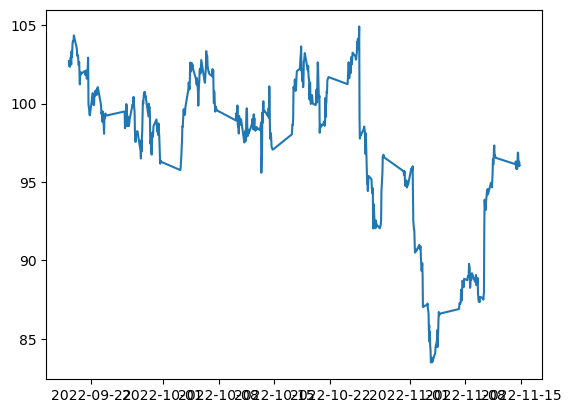

In [96]:
plt.plot(data["4. close"])

In [97]:
# rename the data

columns = ["open","high","low","close","volume"]
data.columns = columns

In [98]:
data["TradeDate"] = data.index.date
data["time"] = data.index.time

In [99]:
data.loc["2022-11-08"].head(10)


,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2022-11-08 20:00:00,89.25,89.250,88.8400,89.1800,9334.0,2022-11-08,20:00:00
2022-11-08 19:00:00,88.72,89.250,88.7000,89.1601,8639.0,2022-11-08,19:00:00
2022-11-08 18:00:00,88.86,88.900,88.7500,88.7700,12088.0,2022-11-08,18:00:00
2022-11-08 17:00:00,88.91,88.940,88.6600,88.8500,1077271.0,2022-11-08,17:00:00
2022-11-08 16:00:00,88.35,89.590,88.3100,88.9400,4567968.0,2022-11-08,16:00:00
2022-11-08 15:00:00,88.25,88.520,87.6500,88.3500,3336347.0,2022-11-08,15:00:00
2022-11-08 14:00:00,89.57,89.660,88.1792,88.2500,3411939.0,2022-11-08,14:00:00
2022-11-08 13:00:00,89.62,89.780,89.4000,89.5700,2274302.0,2022-11-08,13:00:00
2022-11-08 12:00:00,89.78,90.405,89.5650,89.6100,4030386.0,2022-11-08,12:00:00


In [100]:
#set a limit to trading times
market = data.between_time("09:30:00","16:00:00").copy()
market.sort_index(inplace=True)
market.info()
#data is also 8 days worth

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 287 entries, 2022-09-19 10:00:00 to 2022-11-14 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       287 non-null    float64
 1   high       287 non-null    float64
 2   low        287 non-null    float64
 3   close      287 non-null    float64
 4   volume     287 non-null    float64
 5   TradeDate  287 non-null    object 
 6   time       287 non-null    object 
dtypes: float64(5), object(2)
memory usage: 17.9+ KB


In [101]:
market.groupby("TradeDate").agg({"low":min,"high":max})

,low,high
TradeDate,,
2022-09-19,102.3600,104.0200
2022-09-20,101.1200,103.1700
2022-09-21,99.9900,103.4900
2022-09-22,99.2000,101.6800
2022-09-23,98.0100,100.4500
2022-09-26,98.2100,100.4400
2022-09-27,97.3400,100.4600
2022-09-28,97.5200,101.4000
2022-09-29,96.5200,99.9000


In [102]:
market.loc[market.groupby("TradeDate")['low'].idxmin()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2022-09-19 10:00:00,102.7000,103.3000,102.3600,102.9110,2483318.0,2022-09-19,10:00:00
2022-09-20 14:00:00,101.9800,102.0400,101.1200,101.2299,2455281.0,2022-09-20,14:00:00
2022-09-21 16:00:00,102.9400,103.1400,99.9900,100.0000,6875420.0,2022-09-21,16:00:00
2022-09-22 10:00:00,99.9000,100.8000,99.2000,100.6000,3243446.0,2022-09-22,10:00:00
2022-09-23 15:00:00,98.5300,98.7400,98.0100,98.0750,2658565.0,2022-09-23,15:00:00
2022-09-26 10:00:00,99.1700,100.0200,98.2100,99.9700,3432240.0,2022-09-26,10:00:00
2022-09-27 15:00:00,97.5500,98.2026,97.3400,98.0343,2430418.0,2022-09-27,15:00:00
2022-09-28 10:00:00,97.9600,99.0150,97.5200,98.1800,2954661.0,2022-09-28,10:00:00
2022-09-29 15:00:00,96.7500,97.1000,96.5200,96.7500,1872447.0,2022-09-29,15:00:00


In [103]:
market.loc[market.groupby("TradeDate")['high'].idxmax()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2022-09-19 16:00:00,103.2550,104.0200,103.2501,103.8550,3933835.0,2022-09-19,16:00:00
2022-09-20 10:00:00,102.9740,103.1700,102.4100,102.4700,2390742.0,2022-09-20,10:00:00
2022-09-21 15:00:00,102.5500,103.4900,100.1100,102.9300,6697396.0,2022-09-21,15:00:00
2022-09-22 16:00:00,100.7250,101.6800,100.4400,100.5500,4348706.0,2022-09-22,16:00:00
2022-09-23 10:00:00,99.4500,100.4500,98.8300,98.8501,3412130.0,2022-09-23,10:00:00
2022-09-26 11:00:00,99.9700,100.4400,99.6400,99.8750,3557899.0,2022-09-26,11:00:00
2022-09-27 10:00:00,100.0600,100.4600,99.3500,99.6901,3172225.0,2022-09-27,10:00:00
2022-09-28 16:00:00,100.6200,101.4000,100.5900,100.7200,4370416.0,2022-09-28,16:00:00
2022-09-29 10:00:00,99.4800,99.9000,97.5700,97.9400,2769731.0,2022-09-29,10:00:00


In [104]:
high_price = market["high"].mean()

In [105]:
low_price = market["low"].mean()

In [106]:
daily_max = market["high"].max()
daily_low = market["low"].min()

In [107]:
open_price = market["open"][0]
close_price = market['close'][0]
close_price

102.911

In [108]:
percentage_change = abs((open_price - close_price)/close_price * 100)

In [109]:
float(high_price)
float(low_price)

96.82330069686414

In [110]:
my_data = pd.DataFrame(data={
    "Daily High": f'{high_price:.2f}',
    "Daily Low": f'{low_price:.2f}',
    "Daily Max Price": [daily_max],
    "Daily Low Price": [daily_low],
    "Daily Open Price": [open_price],
    "Daily Close Price": f'{close_price:.2f}',
    "Daily Percentage Change": f"% {percentage_change:.2f}"
})
my_data

,Daily High,Daily Low,Daily Max Price,Daily Low Price,Daily Open Price,Daily Close Price,Daily Percentage Change
0,97.88,96.82,105.0999,83.45,102.7,102.91,% 0.21


In [111]:
market.loc[market.groupby("TradeDate")['high'].idxmax()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2022-09-19 16:00:00,103.2550,104.0200,103.2501,103.8550,3933835.0,2022-09-19,16:00:00
2022-09-20 10:00:00,102.9740,103.1700,102.4100,102.4700,2390742.0,2022-09-20,10:00:00
2022-09-21 15:00:00,102.5500,103.4900,100.1100,102.9300,6697396.0,2022-09-21,15:00:00
2022-09-22 16:00:00,100.7250,101.6800,100.4400,100.5500,4348706.0,2022-09-22,16:00:00
2022-09-23 10:00:00,99.4500,100.4500,98.8300,98.8501,3412130.0,2022-09-23,10:00:00
2022-09-26 11:00:00,99.9700,100.4400,99.6400,99.8750,3557899.0,2022-09-26,11:00:00
2022-09-27 10:00:00,100.0600,100.4600,99.3500,99.6901,3172225.0,2022-09-27,10:00:00
2022-09-28 16:00:00,100.6200,101.4000,100.5900,100.7200,4370416.0,2022-09-28,16:00:00
2022-09-29 10:00:00,99.4800,99.9000,97.5700,97.9400,2769731.0,2022-09-29,10:00:00


In [112]:
html = market.to_html()

In [113]:
text_file = open("GOOG.html","w")
text_file.write(html)
text_file.close()